# Intro to Machine Learning on Coursera

Based on the [Machine Learning Specialization course by Andrew Ng](https://www.coursera.org/specializations/machine-learning-introduction)

In [1]:
# Imports
import random
from sympy import symbols, diff, lambdify
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Supervised Machine Learning: Regression and Classification

### Polynomial Regression

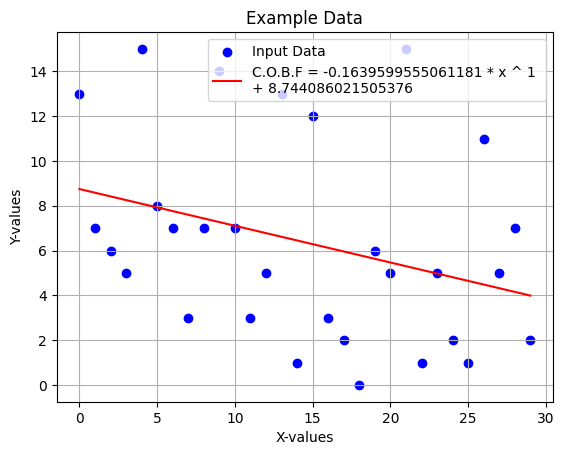

In [2]:
# Polynomial regression
polyDeg = 1

# Training data
xArr:npt.NDArray[np.int64] = np.array([x for x in range(0, 30)])
yArr:npt.NDArray[np.int64] = np.array([random.randint(0, 15) for y in range(0, 30)])
# Curve of best fit and weights
predWeights:npt.NDArray[np.float64] = np.polyfit(xArr, yArr, polyDeg) 
bestFitCurve:npt.NDArray[np.floating] = np.polyval(predWeights, xArr)

# Format polynomial function strings
def extrapolatePolynomials():
    functionString:str = ""
    displayString:str = ""
    # Generate strings
    for index in range(len(predWeights)):
        currDeg:int = len(predWeights) - index - 1
        functionString += f"{predWeights[index]}" 
        displayString += f"{predWeights[index]}"
        if currDeg > 0:
            functionString += f" * x ** + {currDeg} + "
            displayString += f" * x ^ {currDeg} \n+ "
    
    #Generate executable polynomial function from functionString
    executablePolynomial:function = lambdify(["x"], functionString)
    return (executablePolynomial, displayString)

#Store function and configured string for later
bestFitPoly, cobfStr = extrapolatePolynomials()

# Plot
plt.figure()
plt.scatter(xArr, yArr, color="blue", label="Input Data")
plt.plot(xArr, bestFitCurve, color="red", label=f"C.O.B.F = {cobfStr}")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Example Data")
plt.legend()
plt.grid(True)
plt.show()

### Gradient Descent

In [3]:
# Gradient descent on a known cost function
# Cost function, f(x)
def cost_func(x:float):
    return bestFitPoly(x) # calculated earlier from COBF
# Gradient of the cost function, f'(x)
def gradient(x:float):
    a = symbols('x')
    f_prime = diff(cost_func(a), a)
    derivative:function = lambdify(["x"], f_prime)
    return derivative(x)

# Gradient Descent parameters
learnRate:float = 2**(-8) # Step size 1/(2^8)
iterations:int = 10_000 # Number of iterations
xGuess:float = 0.0 # Initial guess for x (starting point)

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = gradient(xGuess)
    
    # Update x using the Gradient Descent formula
    xGuess = xGuess - learnRate * grad

# The value of x after optimization represents the minimum of the cost function
minimum_x:float = xGuess
minimum_cost:float = cost_func(minimum_x)

# Print the result
print(f"Minimum value of x: {minimum_x}")
print(f"Minimum cost: {minimum_cost}")

Minimum value of x: 6.404685761956476
Minimum cost: 7.693974028944324


### Logistic Regression

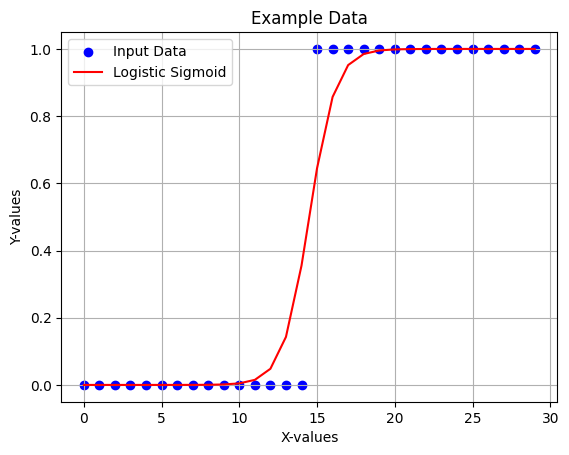

In [4]:
# Classification via Logistic Regression
xArr = np.array([x for x in range(0, 30)])
yArr = np.array([0 for y in range(0, 15)]
                + [1 for y in range(15, 30)]) # either 0 or 1

# Create an instance of a logistic regressor
logReg = LogisticRegression()
logReg.fit(xArr.reshape(-1, 1), yArr)
# Should match yArr, since "testing" with the training input
# print(logReg.predict(xArr.reshape(-1, 1))) 

# Plot
plt.figure()
plt.scatter(xArr, yArr, color="blue", label="Input Data")

plt.plot(xArr, logReg.predict_proba(xArr.reshape(-1, 1))[:,1],
        color="red", label="Logistic Sigmoid")# only plot the probability of being 1
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Example Data")
plt.legend()
plt.grid(True)
plt.show()

### Polynomial and Logistic Regression

- Maybe todo, Idk yet

In [5]:
print("TODO later")

TODO later


## Advanced Learning Algorithms

In [15]:
import tensorflow as tf
from keras import layers

### Simple Tensorflow Inference

In [17]:
# Roasting coffee beans at 200 degrees Celsius, for 17 minutes
inputArr:npt.NDArray[np.floating] = np.array([[200.0, 17.0]])

# Create the first layer
layer1 = layers.Dense(units=3, activation="sigmoid") # 1x3 tensor
print(layer1(inputArr)) # lists the tensor, its shape, and its type
print(layer1.weights) # lists the weights of the layer

#?

tf.Tensor([[1.0000000e+00 0.0000000e+00 1.7076655e-27]], shape=(1, 3), dtype=float32)
[<KerasVariable shape=(2, 3), dtype=float32, path=dense_3/kernel>, <KerasVariable shape=(3,), dtype=float32, path=dense_3/bias>]


## Unsupervised Learning, Recommenders, Reinforcement Learning

### TBD